In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

In [49]:
df = pd.read_csv('data/organized_uber.csv', parse_dates=['record_time'])
df.set_index('record_time', inplace=True)
df.index = df.index - pd.Timedelta(hours=7)
df['hour'] = df.index.hour
df['date'] = df.index.date
df['dayofweek'] = df.index.dayofweek
df['weekofyear'] = df.index.weekofyear

In [5]:
we = pd.read_csv('data/weather_021516_033016_organized.csv', parse_dates=['hourly_time'])
we.set_index('hourly_time', inplace=True)

In [6]:
we.head()

,city,hourly_apparentTemperature,hourly_cloudCover,hourly_dewPoint,hourly_humidity,hourly_icon,hourly_ozone,hourly_precipAccumulation,hourly_precipIntensity,hourly_precipProbability,...,daily_sunriseTime,daily_sunsetTime,daily_temperatureMax,daily_temperatureMaxTime,daily_temperatureMin,daily_temperatureMinTime,daily_time,daily_visibility,daily_windBearing,daily_windSpeed
hourly_time,,,,,,,,,,,,,,,,,,,,,
2016-02-15 00:00:00,denver,25.77,0.19,27.17,0.86,clear-night,NaN,NaN,0,0,...,1455544467,1455582998,56.63,1455573600,30.87,1455519600,2016-02-15 07:00:00,10,277,15.23
2016-02-15 01:00:00,denver,25.60,0.19,24.38,0.75,clear-night,NaN,NaN,0,0,...,1455544467,1455582998,56.63,1455573600,30.87,1455519600,2016-02-15 07:00:00,10,277,15.23
2016-02-15 02:00:00,denver,25.47,0.19,22.61,0.68,clear-night,NaN,NaN,0,0,...,1455544467,1455582998,56.63,1455573600,30.87,1455519600,2016-02-15 07:00:00,10,277,15.23
2016-02-15 03:00:00,denver,26.79,0.19,22.76,0.61,clear-night,NaN,NaN,0,0,...,1455544467,1455582998,56.63,1455573600,30.87,1455519600,2016-02-15 07:00:00,10,277,15.23
2016-02-15 04:00:00,denver,29.13,0.19,21.83,0.53,clear-night,NaN,NaN,0,0,...,1455544467,1455582998,56.63,1455573600,30.87,1455519600,2016-02-15 07:00:00,10,277,15.23


In [64]:
uber = df.groupby(['date','hour','city','display_name']).mean().reset_index()
uber['hourly_time'] = pd.to_datetime(uber['date'].astype(str) + ' ' + uber['hour'].astype(str) + ":00:00")
uber.set_index('hourly_time', inplace=True)
uber.head()

,date,hour,city,display_name,low_estimate,avg_price_est,high_estimate,trip_duration,trip_distance,surge_multiplier,...,cost_per_minute,cost_per_distance,cancellation_fee,service_fees,start_latitude,start_longitude,stop_latitude,stop_longitude,dayofweek,weekofyear
hourly_time,,,,,,,,,,,,,,,,,,,,,
2016-02-15 08:00:00,2016-02-15,8,chicago,uberBLACK,68,78.5,89,1920,15.78,1,...,0.40,3.50,10,0.0,41.877688,-87.630413,41.973551,-87.909057,0,7
2016-02-15 08:00:00,2016-02-15,8,chicago,uberESPANOL,26,30.0,34,1920,15.78,1,...,0.20,0.90,5,1.2,41.877688,-87.630413,41.973551,-87.909057,0,7
2016-02-15 08:00:00,2016-02-15,8,chicago,uberSELECT,49,55.5,62,1920,15.78,1,...,0.35,2.00,5,1.2,41.877688,-87.630413,41.973551,-87.909057,0,7
2016-02-15 08:00:00,2016-02-15,8,chicago,uberSUV,87,99.5,112,1920,15.78,1,...,0.55,4.05,10,0.0,41.877688,-87.630413,41.973551,-87.909057,0,7
2016-02-15 08:00:00,2016-02-15,8,chicago,uberTAXI,NaN,NaN,NaN,1920,15.78,1,...,NaN,NaN,NaN,0.0,41.877688,-87.630413,41.973551,-87.909057,0,7


In [67]:
carwe = uber.reset_index().merge(we.reset_index(), left_on=['hourly_time','city'], right_on=['hourly_time','city'])

In [68]:
carwe.set_index('hourly_time', inplace=True)

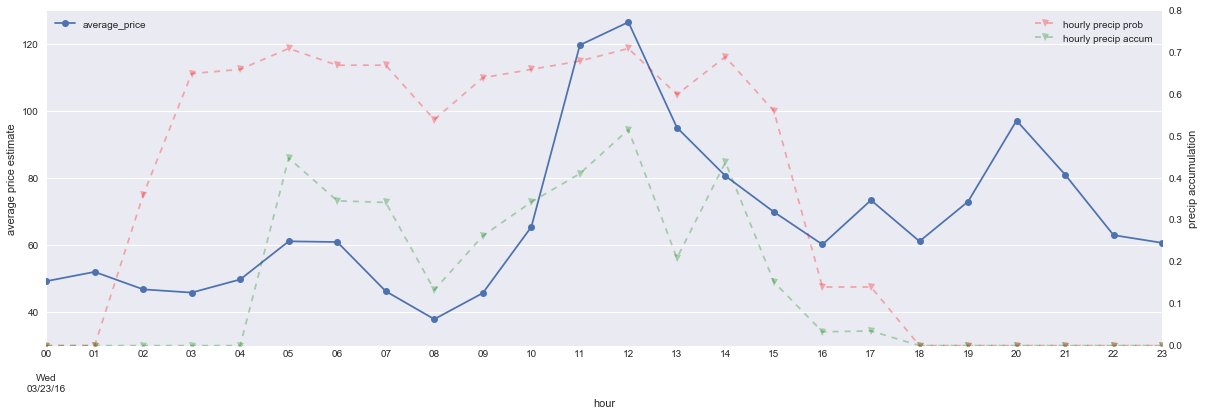

In [135]:
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter, HourLocator

fig, ax = plt.subplots(figsize=(20,6))
data = carwe.query("city == 'denver' and display_name == 'uberX'").ix['2016-03-23']
data['percent_price'] = data['avg_price_est'] / data['avg_price_est'].max()
ax.plot_date(data.index.to_pydatetime(), data['avg_price_est'].values, 'o-', label='average_price');
# ax.plot_date(data.index.to_pydatetime(), data['percent_price'].values, 'o-', label='average_price');
# ax.plot_date(data.index.to_pydatetime(), data['hourly_pressure'].values, 'o-', label='hourly pressure');
ax2 = ax.twinx()
ax2.plot_date(data.index.to_pydatetime(), data['hourly_precipProbability'].values, 'v--', color='r', label='hourly precip prob', alpha=0.3);
ax2.plot_date(data.index.to_pydatetime(), data.fillna(0)['hourly_precipAccumulation'].values, 'v--', color='g', label='hourly precip accum', alpha=0.3)
# ax2.plot_date(data.index.to_pydatetime(), data['hourly_precipIntensity'].values, 'o-', label='hourly precip inten')
ax2.grid([])
ax2.set_ylabel('precip accumulation')
ax2.legend(loc='upper right')
ax.xaxis.set_minor_locator(HourLocator(byhour=range(24), interval=1))
ax.xaxis.set_minor_formatter(DateFormatter('%H'))
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=range(7), interval=1))
ax.xaxis.set_major_formatter(DateFormatter('\n\n%a\n%D'))
# ax.set_title('{} price spike on {} in {}'.format(cartype, dateofint, city))
ax.set_ylabel('average price estimate')
ax.set_xlabel('hour')
ax.legend(loc='upper left');

In [85]:
data.corr()['avg_price_est'].sort_values(ascending=False)

avg_price_est                       1.000000e+00
high_estimate                       9.999906e-01
low_estimate                        9.999835e-01
surge_multiplier                    9.871654e-01
surge_minimum_price                 9.830428e-01
hourly_pressure                     4.681833e-01
hourly_precipAccumulation           4.377560e-01
base_minimum_price                  4.242694e-01
stop_longitude                      4.226771e-01
hour                                4.183042e-01
pickup_estimate                     3.053682e-01
hourly_precipIntensity              2.346534e-01
hourly_humidity                     1.014045e-01
hourly_windSpeed                    9.580480e-02
hourly_precipProbability            9.421409e-02
trip_distance                       7.317435e-02
start_longitude                     4.203936e-02
daily_moonPhase                     7.898304e-17
latitude                            7.898304e-17
daily_precipIntensity               7.898304e-17
daily_precipIntensit

In [103]:
data['hourly_precipAccumulation'].values

array([   nan,    nan,    nan,    nan,    nan,  0.448,  0.346,  0.342,
        0.133,  0.262,  0.343,  0.411,  0.516,  0.209,  0.438,  0.152,
        0.033,  0.035,    nan,    nan,    nan,    nan,    nan,    nan])

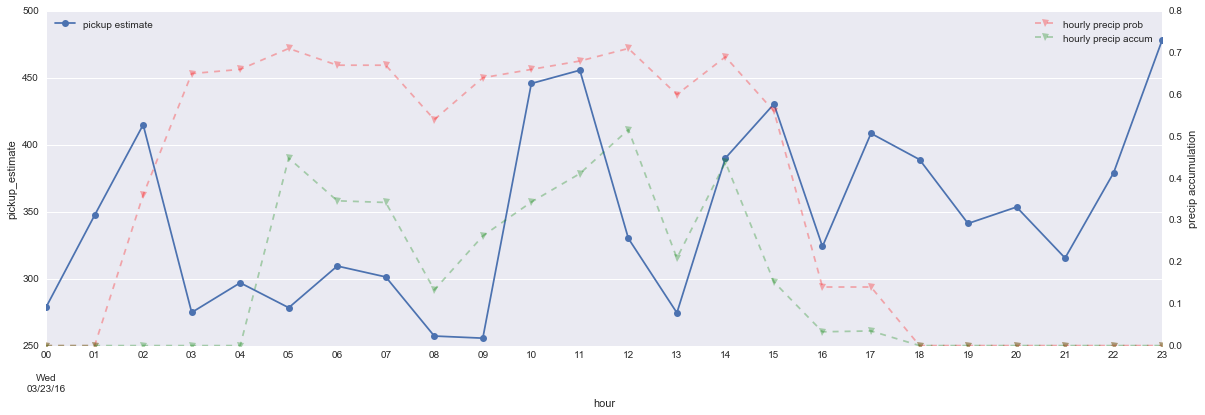

In [141]:
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter, HourLocator

fig, ax = plt.subplots(figsize=(20,6))
data = carwe.query("city == 'denver' and display_name == 'uberX'").ix['2016-03-23']
data['percent_price'] = data['avg_price_est'] / data['avg_price_est'].max()
ax.plot_date(data.index.to_pydatetime(), data['pickup_estimate'].values, 'o-', label='pickup estimate');
# ax.plot_date(data.index.to_pydatetime(), data['percent_price'].values, 'o-', label='average_price');
# ax.plot_date(data.index.to_pydatetime(), data['hourly_pressure'].values, 'o-', label='hourly pressure');
ax2 = ax.twinx()
ax2.plot_date(data.index.to_pydatetime(), data['hourly_precipProbability'].values, 'v--', color='r', label='hourly precip prob', alpha=0.3);
ax2.plot_date(data.index.to_pydatetime(), data.fillna(0)['hourly_precipAccumulation'].values, 'v--', color='g', label='hourly precip accum', alpha=0.3)
# ax2.plot_date(data.index.to_pydatetime(), data['hourly_precipIntensity'].values, 'o-', label='hourly precip inten')
ax2.grid([])
ax2.set_ylabel('precip accumulation')
ax2.legend(loc='upper right')
ax.xaxis.set_minor_locator(HourLocator(byhour=range(24), interval=1))
ax.xaxis.set_minor_formatter(DateFormatter('%H'))
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=range(7), interval=1))
ax.xaxis.set_major_formatter(DateFormatter('\n\n%a\n%D'))
# ax.set_title('{} price spike on {} in {}'.format(cartype, dateofint, city))
ax.set_ylabel('pickup_estimate')
ax.set_xlabel('hour')
ax.legend(loc='upper left');

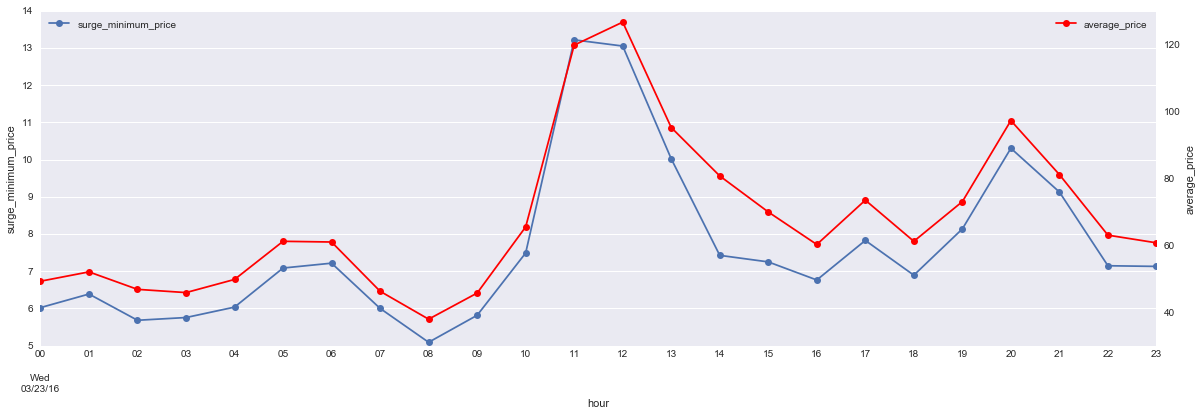

In [146]:
fig, ax = plt.subplots(figsize=(20,6))
data = carwe.query("city == 'denver' and display_name == 'uberX'").ix['2016-03-23']
data['percent_price'] = data['avg_price_est'] / data['avg_price_est'].max()
ax.plot_date(data.index.to_pydatetime(), data['surge_minimum_price'].values, 'o-', label='surge_minimum_price');
# ax.plot_date(data.index.to_pydatetime(), data['percent_price'].values, 'o-', label='percent_price');
# ax.plot_date(data.index.to_pydatetime(), data['hourly_pressure'].values, 'o-', label='hourly pressure');
ax2 = ax.twinx()
# ax2.plot_date(data.index.to_pydatetime(), data['hourly_precipProbability'].values, 'v--', color='r', label='hourly precip prob', alpha=0.3);
# ax2.plot_date(data.index.to_pydatetime(), data.fillna(0)['hourly_precipAccumulation'].values, 'v--', color='g', label='hourly precip accum', alpha=0.3)
# ax2.plot_date(data.index.to_pydatetime(), data['hourly_precipIntensity'].values, 'o-', label='hourly precip inten')
ax2.plot_date(data.index.to_pydatetime(), data['avg_price_est'].values, 'o-', color='r', label='average_price');
ax2.grid([])
ax2.set_ylabel('average_price')
ax2.legend(loc='upper right')
ax.xaxis.set_minor_locator(HourLocator(byhour=range(24), interval=1))
ax.xaxis.set_minor_formatter(DateFormatter('%H'))
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=range(7), interval=1))
ax.xaxis.set_major_formatter(DateFormatter('\n\n%a\n%D'))
# ax.set_title('{} price spike on {} in {}'.format(cartype, dateofint, city))
ax.set_ylabel('surge_minimum_price')
ax.set_xlabel('hour')
ax.legend(loc='upper left');

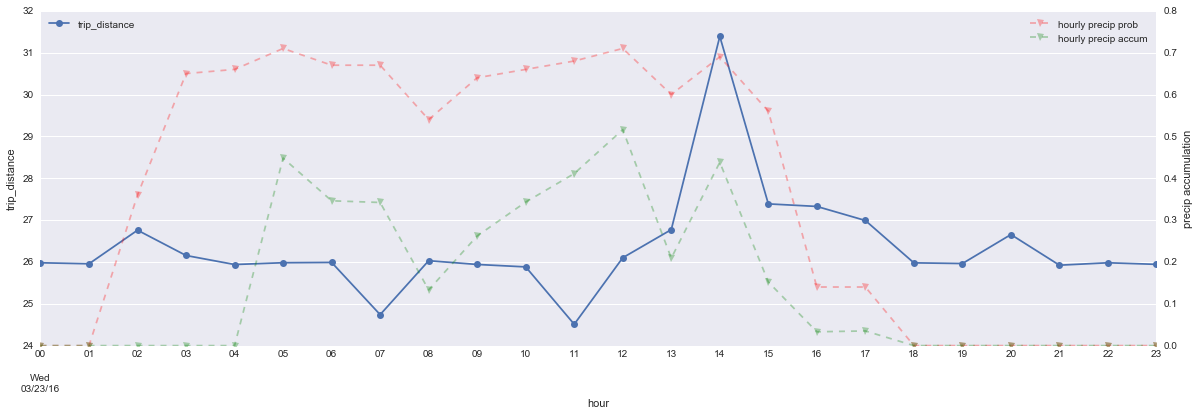

In [142]:
fig, ax = plt.subplots(figsize=(20,6))
data = carwe.query("city == 'denver' and display_name == 'uberX'").ix['2016-03-23']
data['percent_price'] = data['avg_price_est'] / data['avg_price_est'].max()
ax.plot_date(data.index.to_pydatetime(), data['trip_distance'].values, 'o-', label='trip_distance');
# ax.plot_date(data.index.to_pydatetime(), data['percent_price'].values, 'o-', label='average_price');
# ax.plot_date(data.index.to_pydatetime(), data['hourly_pressure'].values, 'o-', label='hourly pressure');
ax2 = ax.twinx()
ax2.plot_date(data.index.to_pydatetime(), data['hourly_precipProbability'].values, 'v--', color='r', label='hourly precip prob', alpha=0.3);
ax2.plot_date(data.index.to_pydatetime(), data.fillna(0)['hourly_precipAccumulation'].values, 'v--', color='g', label='hourly precip accum', alpha=0.3)
# ax2.plot_date(data.index.to_pydatetime(), data['hourly_precipIntensity'].values, 'o-', label='hourly precip inten')
ax2.grid([])
ax2.set_ylabel('precip accumulation')
ax2.legend(loc='upper right')
ax.xaxis.set_minor_locator(HourLocator(byhour=range(24), interval=1))
ax.xaxis.set_minor_formatter(DateFormatter('%H'))
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=range(7), interval=1))
ax.xaxis.set_major_formatter(DateFormatter('\n\n%a\n%D'))
# ax.set_title('{} price spike on {} in {}'.format(cartype, dateofint, city))
ax.set_ylabel('trip_distance')
ax.set_xlabel('hour')
ax.legend(loc='upper left');

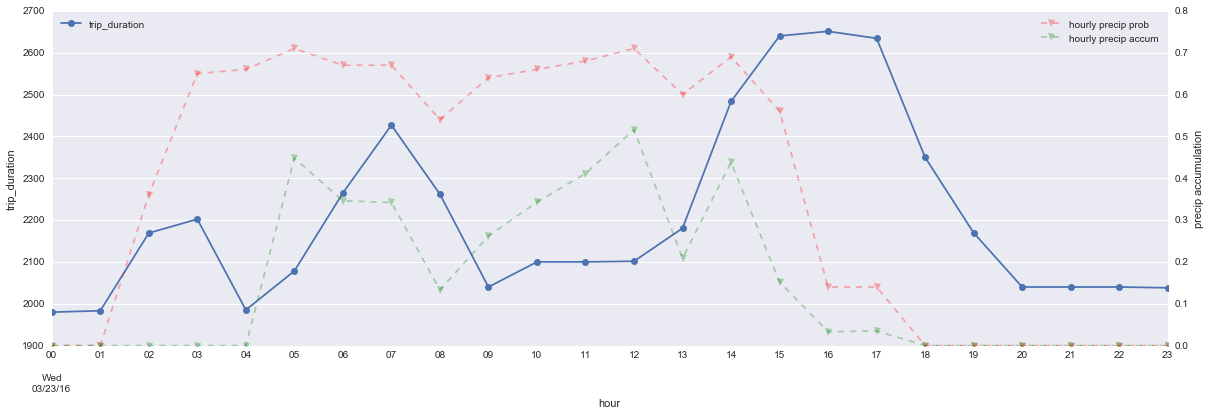

In [143]:
fig, ax = plt.subplots(figsize=(20,6))
data = carwe.query("city == 'denver' and display_name == 'uberX'").ix['2016-03-23']
data['percent_price'] = data['avg_price_est'] / data['avg_price_est'].max()
ax.plot_date(data.index.to_pydatetime(), data['trip_duration'].values, 'o-', label='trip_duration');
# ax.plot_date(data.index.to_pydatetime(), data['percent_price'].values, 'o-', label='average_price');
# ax.plot_date(data.index.to_pydatetime(), data['hourly_pressure'].values, 'o-', label='hourly pressure');
ax2 = ax.twinx()
ax2.plot_date(data.index.to_pydatetime(), data['hourly_precipProbability'].values, 'v--', color='r', label='hourly precip prob', alpha=0.3);
ax2.plot_date(data.index.to_pydatetime(), data.fillna(0)['hourly_precipAccumulation'].values, 'v--', color='g', label='hourly precip accum', alpha=0.3)
# ax2.plot_date(data.index.to_pydatetime(), data['hourly_precipIntensity'].values, 'o-', label='hourly precip inten')
ax2.grid([])
ax2.set_ylabel('precip accumulation')
ax2.legend(loc='upper right')
ax.xaxis.set_minor_locator(HourLocator(byhour=range(24), interval=1))
ax.xaxis.set_minor_formatter(DateFormatter('%H'))
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=range(7), interval=1))
ax.xaxis.set_major_formatter(DateFormatter('\n\n%a\n%D'))
# ax.set_title('{} price spike on {} in {}'.format(cartype, dateofint, city))
ax.set_ylabel('trip_duration')
ax.set_xlabel('hour')
ax.legend(loc='upper left');

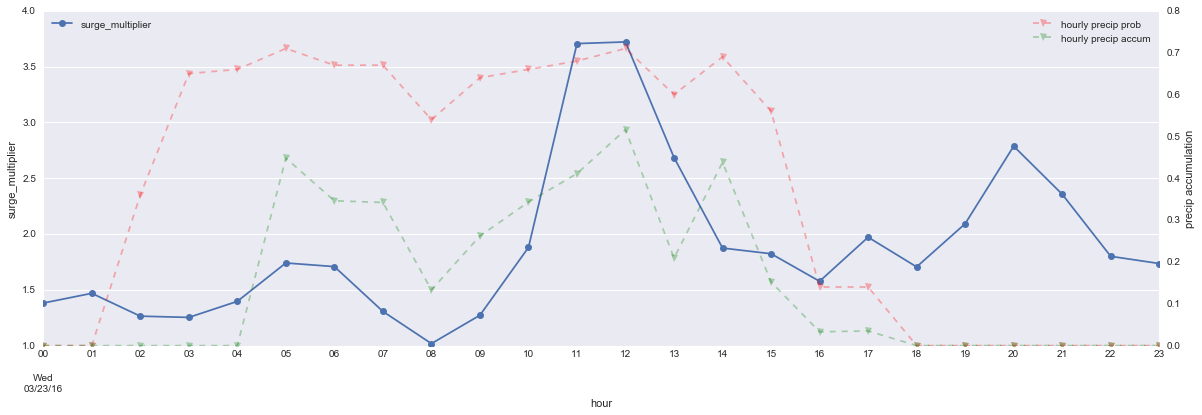

In [144]:
fig, ax = plt.subplots(figsize=(20,6))
data = carwe.query("city == 'denver' and display_name == 'uberX'").ix['2016-03-23']
data['percent_price'] = data['avg_price_est'] / data['avg_price_est'].max()
ax.plot_date(data.index.to_pydatetime(), data['surge_multiplier'].values, 'o-', label='surge_multiplier');
# ax.plot_date(data.index.to_pydatetime(), data['percent_price'].values, 'o-', label='average_price');
# ax.plot_date(data.index.to_pydatetime(), data['hourly_pressure'].values, 'o-', label='hourly pressure');
ax2 = ax.twinx()
ax2.plot_date(data.index.to_pydatetime(), data['hourly_precipProbability'].values, 'v--', color='r', label='hourly precip prob', alpha=0.3);
ax2.plot_date(data.index.to_pydatetime(), data.fillna(0)['hourly_precipAccumulation'].values, 'v--', color='g', label='hourly precip accum', alpha=0.3)
# ax2.plot_date(data.index.to_pydatetime(), data['hourly_precipIntensity'].values, 'o-', label='hourly precip inten')
ax2.grid([])
ax2.set_ylabel('precip accumulation')
ax2.legend(loc='upper right')
ax.xaxis.set_minor_locator(HourLocator(byhour=range(24), interval=1))
ax.xaxis.set_minor_formatter(DateFormatter('%H'))
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=range(7), interval=1))
ax.xaxis.set_major_formatter(DateFormatter('\n\n%a\n%D'))
# ax.set_title('{} price spike on {} in {}'.format(cartype, dateofint, city))
ax.set_ylabel('surge_multiplier')
ax.set_xlabel('hour')
ax.legend(loc='upper left');

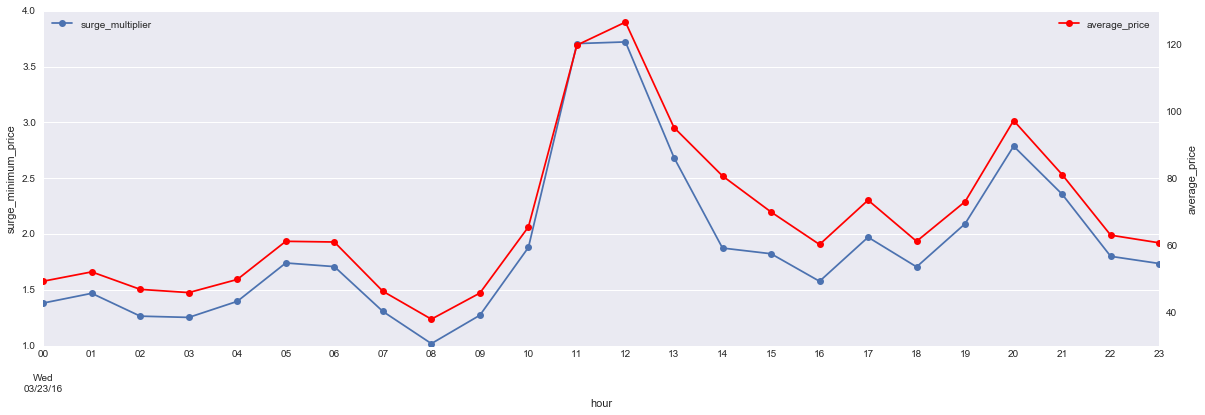

In [147]:
fig, ax = plt.subplots(figsize=(20,6))
data = carwe.query("city == 'denver' and display_name == 'uberX'").ix['2016-03-23']
data['percent_price'] = data['avg_price_est'] / data['avg_price_est'].max()
ax.plot_date(data.index.to_pydatetime(), data['surge_multiplier'].values, 'o-', label='surge_multiplier');
# ax.plot_date(data.index.to_pydatetime(), data['percent_price'].values, 'o-', label='percent_price');
# ax.plot_date(data.index.to_pydatetime(), data['hourly_pressure'].values, 'o-', label='hourly pressure');
ax2 = ax.twinx()
# ax2.plot_date(data.index.to_pydatetime(), data['hourly_precipProbability'].values, 'v--', color='r', label='hourly precip prob', alpha=0.3);
# ax2.plot_date(data.index.to_pydatetime(), data.fillna(0)['hourly_precipAccumulation'].values, 'v--', color='g', label='hourly precip accum', alpha=0.3)
# ax2.plot_date(data.index.to_pydatetime(), data['hourly_precipIntensity'].values, 'o-', label='hourly precip inten')
ax2.plot_date(data.index.to_pydatetime(), data['avg_price_est'].values, 'o-', color='r', label='average_price');
ax2.grid([])
ax2.set_ylabel('average_price')
ax2.legend(loc='upper right')
ax.xaxis.set_minor_locator(HourLocator(byhour=range(24), interval=1))
ax.xaxis.set_minor_formatter(DateFormatter('%H'))
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=range(7), interval=1))
ax.xaxis.set_major_formatter(DateFormatter('\n\n%a\n%D'))
# ax.set_title('{} price spike on {} in {}'.format(cartype, dateofint, city))
ax.set_ylabel('surge_minimum_price')
ax.set_xlabel('hour')
ax.legend(loc='upper left');